In [1]:
# two

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 50,
        x_rate = 0.5,
        m_rate = 0.5,
        weight_constraint = [-3.,3.],
        radioactive_rating = 0.1,
        grow_factor = 0.1,
        scale_hyperparameter = False,
        regularizer = None))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 4
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    

C:\Users\tcumi\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)


Checkpoint 100, Accuracy: 0.8827160493827161, Loss: 0.4250594598275644
Checkpoint 200, Accuracy: 0.9444444444444444, Loss: 0.38529028715910735
Checkpoint 300, Accuracy: 0.9506172839506173, Loss: 0.34662398585566767
Checkpoint 400, Accuracy: 0.9567901234567902, Loss: 0.32114297372323497
Checkpoint 500, Accuracy: 0.9506172839506173, Loss: 0.2929602375736943


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.88346326 0.03135245 0.08518434]
[1. 0. 0.] <-> [0.77712345 0.14763463 0.07524189]
[1. 0. 0.] <-> [0.865226   0.02080629 0.11396771]
[1. 0. 0.] <-> [0.8970044  0.03006205 0.07293355]
[1. 0. 0.] <-> [0.8788297  0.02176786 0.09940237]
[1. 0. 0.] <-> [0.90136737 0.03580362 0.06282892]
[1. 0. 0.] <-> [0.8908555  0.02889053 0.08025401]
[1. 0. 0.] <-> [0.89328235 0.0215415  0.08517621]
[1. 0. 0.] <-> [0.8076556  0.10813538 0.08420905]
[1. 0. 0.] <-> [0.88655275 0.02073713 0.09271014]
[1. 0. 0.] <-> [0.89042753 0.03759184 0.07198071]
[1. 0. 0.] <-> [0.8547511  0.01374443 0.13150445]
[1. 0. 0.] <-> [0.86216444 0.02693412 0.11090147]
[1. 0. 0.] <-> [0.78879565 0.03998161 0.17122267]
[0. 1. 0.] <-> [0.06756745 0.9092064  0.02322619]
[1. 0. 0.] <-> [0.8739387  0.018844   0.10721739]
[1. 0. 0.] <-> [0.89464074 0.02426329 0.08109596]
[1. 0. 0.] <-> [0.8620157  0.01708736 0.12089686]
[0. 0. 1.] <-> [0.3228542  0.00350677 0.67363906]
[0. 0. 1.] <-> [0.33336923 0.00294583 0.66368496]


In [12]:
# Testing Performance

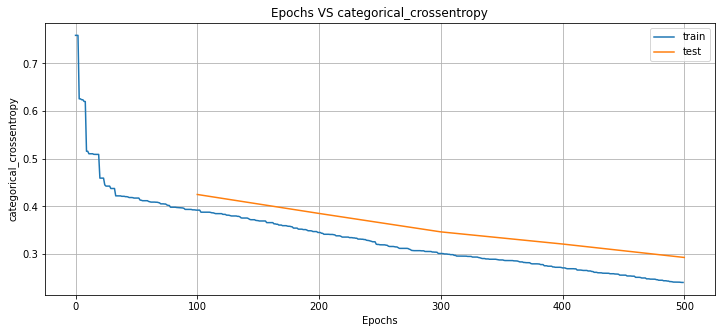

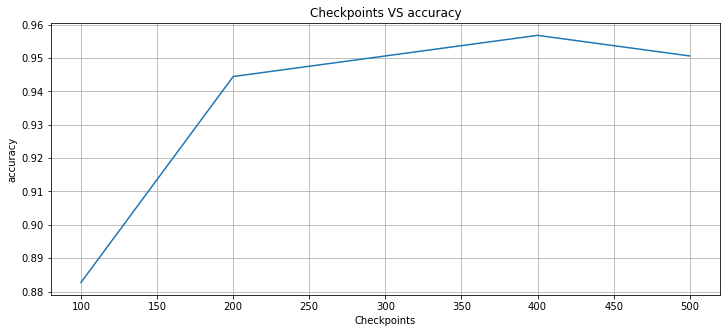

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8827160493827161, 'mean_square_error': 0.22516874439263324, 'categorical_crossentropy': 0.4250594598275644, 'precision': 0.8240740740740741, 'recall': 0.8240740740740741, 'f1': 0.8240740740740741, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 19, 'tn_hit': 11, 'fn_hit': 0}, 1: {'tp_hit': 11, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 5}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 14}}, 'checkpoint': 100} 


{'accuracy': 0.9444444444444444, 'mean_square_error': 0.19383577976533908, 'categorical_crossentropy': 0.38529028715910735, 'precision': 0.9166666666666666, 'recall': 0.9166666666666666, 'f1': 0.9166666666666666, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 9, 'tn_hit': 21, 'fn_hit': 0}, 1: {'tp_hit': 11, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 5}, 2: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 4}}, 'checkpoint': 200} 


{'accuracy': 0.9506172839506173, 'mean_square_error': 0.1727597730569537, 'categorical_crossentropy': 0.34662398585566767, 'precis

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[-2.6479065   2.9703016  -1.2637286   0.5011806  -0.15052488]
 bias: -2.6127536296844482

Neuron 1: weights:
[-0.48884407 -2.7596412  -2.6222548  -1.3748856   2.0501416 ]
 bias: -0.21441294252872467

Neuron 2: weights:
[ 0.35263434 -1.980165   -0.6333956   2.1328096   2.87197   ]
 bias: -1.655121088027954

Neuron 3: weights:
[-1.4732618  1.4072101  1.2983897  2.613184  -1.2192444]
 bias: -1.689927577972412

$
Layer 2
Neuron 0: weights:
[-1.6406602  -0.45800036 -0.23565094 -1.2283714 ]
 bias: 0.7368100881576538

Neuron 1: weights:
[ 0.57072014 -1.1954521  -0.8906301   2.8815565 ]
 bias: -2.6140642166137695

Neuron 2: weights:
[-0.61674136 -0.11158634  3.         -0.28434917]
 bias: -2.1603081226348877

$

